# Machine Learning. Caso: Reconocimiento de Dígitos

Instrucciones:
* Por favor, complete las tareas de este notebook. Deberá enviar este notebook, así como una versión en PDF, a la plataforma Univirtual.
* Para crear el PDF, vaya a Archivo > Descargar como. Puede exportar a PDF mediante Latex, o exportar a HTML y luego imprimir a PDF.
* Añada una explicación clara de su enfoque y una interpretación detallada de sus resultados para cada subpregunta. Para ello, utilice celdas Markdown.

* Añada a continuación los nombres de todos los miembros del equipo.

**Integrantes:**

1.   Integrante 1: Stefano Imanol Ramírez Uribe
2.   Integrante 2: Jhiro Franky Cisneros Sanchez

## MNIST

Se va a usar para esta práctica la base de datos [MNIST](https://www.openml.org/d/554)  de dígitos manuscritos que cuenta con  784 características (datos brutos disponibles en: http://yann.lecun.com/exdb/mnist/9). Esta base de datos contiene 70.000 imágenes de dígitos escritos a mano, clasificados en 10 tipos de dígitos (del 0 al 9), cada uno representado por valores de 28 por 28 píxeles. Puede descargarlo de OpenML y visualizar algunos de los ejemplos

In [6]:
!pip install preamble


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install openml


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Imports generales
%matplotlib inline
from preamble import *
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 100 # Esto controla el tamanio de tus imagenes

In [9]:
import openml as oml

In [10]:
# Descarga de la data de MINST. Demora un poco la primera vez
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute);
mnist_classes = {0:"Cero", 1: "Uno", 2: "Dos", 3: "Tres", 4: "Cuatro", 5: "Cinco",
                  6: "Seis", 7: "Siete", 8: "Ocho", 9: "Nueve"}

In [7]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


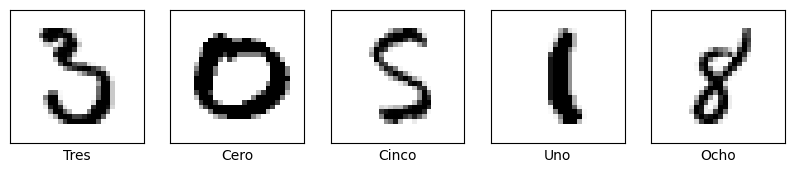

In [8]:
# Toma algunos ejemplos aleatorios, reescala las images al tamaño de 32x32 image y muestralas
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((mnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

1_ Evalúe k-Nearest Neighbors, Regresión Logística y SVM Lineal. (2.5 puntos)
- Tome unav*submuestra estratificada* del 10% de los datos. Use esta muestra para todos los pasos siguientes.
- Evalúe los 3 clasificadores con sus configuraciones por defecto. Use cross-validation con 3 folds, muestre el accuracy y la desviación estándar.
- Discuta cuál funciona mejor.

Nota: puede utilizar una muestra más pequeña durante las pruebas y la corrección de errores.

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

In [10]:
# 1. Submuestra estratificada del 10%
X_sample, _, y_sample, _ = train_test_split(X, y, stratify=y, test_size=0.90, random_state=42)


In [11]:

# 2. Definir modelos con configuración por defecto
modelos = {
    "KNN": KNeighborsClassifier(),  # n_neighbors=5 por defecto
    "Regresión Logística": LogisticRegression(max_iter=1000),  # solver=’lbfgs’, C=1.0, etc.
    "SVM Lineal": SVC(kernel='linear')  # C=1.0, gamma='scale'
}

# 3. Evaluación con cross-validation (3 folds) y escalamiento dentro del pipeline
resultados = {}
for nombre, modelo in modelos.items():
    pipeline = make_pipeline(StandardScaler(), modelo)
    scores = cross_val_score(pipeline, X_sample, y_sample, cv=3, scoring='accuracy')
    resultados[nombre] = {
        "Accuracy promedio": scores.mean(),
        "Desviación estándar": scores.std()
    }

# 4. Mostrar resultados
df_resultados = pd.DataFrame(resultados).T.round(4)
print(df_resultados)


                     Accuracy promedio  Desviación estándar
KNN                             0.8907               0.0079
Regresión Logística             0.8883               0.0020
SVM Lineal                      0.9089               0.0012


2_ Ajuste los parámetros usando GridSearchCV. (2.5 puntos)
- Varíe el hiperparámetro principal (C o k) para los 3 modelos. ¿Mejoran los resultados?  ¿Qué rangos influyen en el rendimiento?
- Visualice el score de prueba y el score de entrenamiento en función de los parámetros de los tres modelos. Discuta cuándo (para qué valores) del modelo se produce underfitting u overfitting.

Nota: Puede utilizar un line plot o 1D heatmap  para la visualización. Utilice de nuevo la validación cruzada (3-fold cross-validation) y el accuracy.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Puede utilizar este gráfico genérico para  la búsqueda en 1D (1D grid search)
# grid_search: el resultado del GridSearchCV
# param_name: el nombre del parámetro que se está variando
def plot_tuning(grid_search, param_name):
    plt.figure()
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax = plt.gca()
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    plt.title(grid_search.best_estimator_.__class__.__name__)
    print('Best configuration:' + str(grid_search.best_params_))
    print('Best score (ACC):' + str(grid_search.best_score_))

Best configuration:{'kneighborsclassifier__n_neighbors': 1}
Best score (ACC):0.8941430976857632


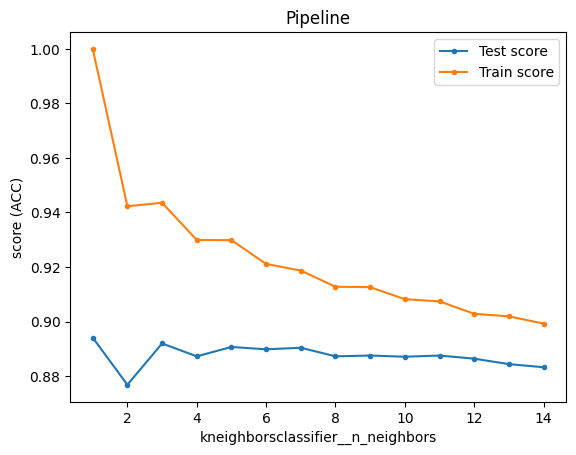

In [14]:
#knn
# Definir el modelo y el rango de k
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid_knn = {'kneighborsclassifier__n_neighbors': list(range(1, 15))}

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=3, scoring='accuracy', return_train_score=True)
grid_knn.fit(X_sample, y_sample)

plot_tuning(grid_knn, 'kneighborsclassifier__n_neighbors')


Best configuration:{'logisticregression__C': 0.01}
Best score (ACC):0.9057146491609219


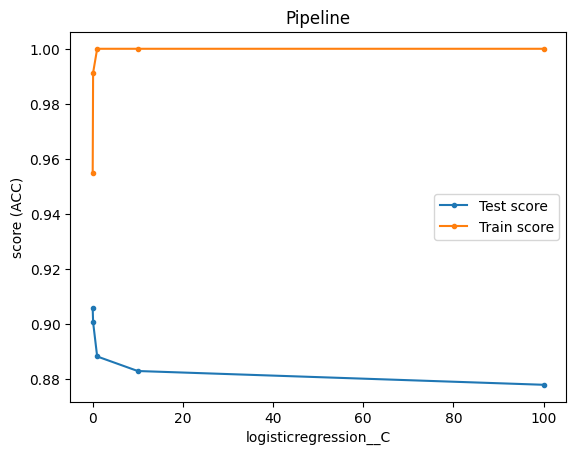

In [26]:
#Regresion Logistica
pipe_log = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid_log = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

grid_log = GridSearchCV(pipe_log, param_grid_log, cv=3, scoring='accuracy', return_train_score=True)
grid_log.fit(X_sample, y_sample)

plot_tuning(grid_log, 'logisticregression__C')


Best configuration:{'svc__C': 0.01}
Best score (ACC):0.9201427722628512


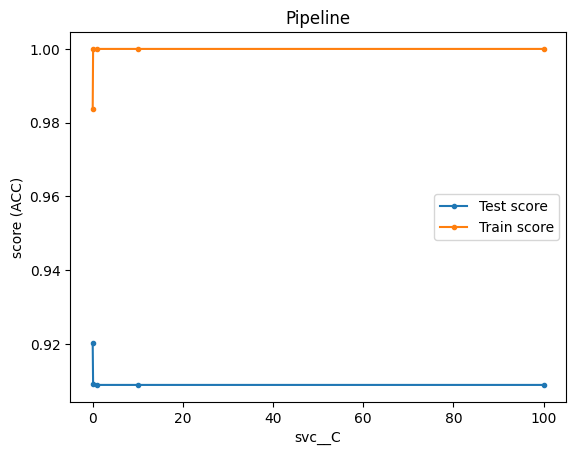

In [ ]:
#SVC Lineal
pipe_svm = make_pipeline(StandardScaler(), SVC(kernel='linear'))
param_grid_svm = {'svc__C': [0.01, 0.1, 1, 10, 100]}

grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=3, scoring='accuracy', return_train_score=True)
grid_svm.fit(X_sample, y_sample)

plot_tuning(grid_svm, 'svc__C')


3_ Analice qué tipos de clasificaciones erróneas (misclassifications) se cometen (2.5 puntos)
- Cree una división estándar train_test
- Entrene la Regresión Logística en los datos de entrenamiento y genere predicciones en el conjunto de prueba
- Visualice (como arriba) unos cuantos ejemplos mal clasificados por Regresión Logística. Discusión: ¿son realmente casos difíciles?
- Construya la matriz de confusión ('confusion_matrix') de todas las predicciones. Discuta en qué clases comunmente se produce confusión/errores.

In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import choice
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:

# División 75% entrenamiento, 25% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)


In [17]:
#Entrenar Regresión Logística y predecir
clf = make_pipeline(StandardScaler(), LogisticRegression(C=0.01,max_iter=1000, random_state=0)) #C es el mejor valor del paso anterior
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

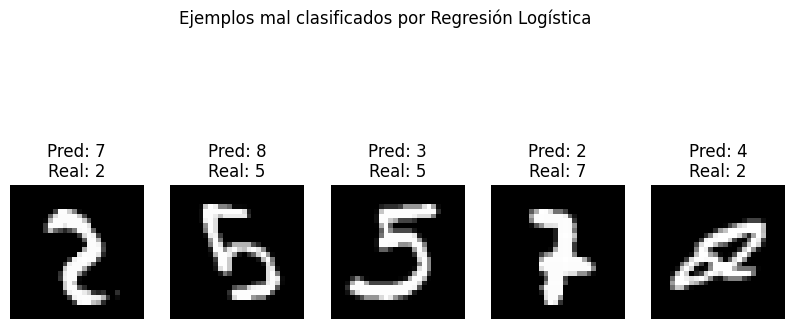

In [18]:
# Resetear índices para alinear con y_pred (que tiene índice desde 0)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Obtener índices donde hay error
errores = (y_pred != y_test_reset)
idx_errores = np.where(errores)[0]  # Esto da índices válidos para arrays y DataFrames reseteados

# Visualizar 5 ejemplos mal clasificados
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    idx = choice(idx_errores)
    imagen = X_test_reset.iloc[idx].values.reshape(28, 28)
    ax.imshow(imagen, cmap='gray')
    ax.set_title(f'Pred: {y_pred[idx]}\nReal: {y_test_reset.iloc[idx]}')
    ax.axis('off')
plt.suptitle('Ejemplos mal clasificados por Regresión Logística')
plt.show()



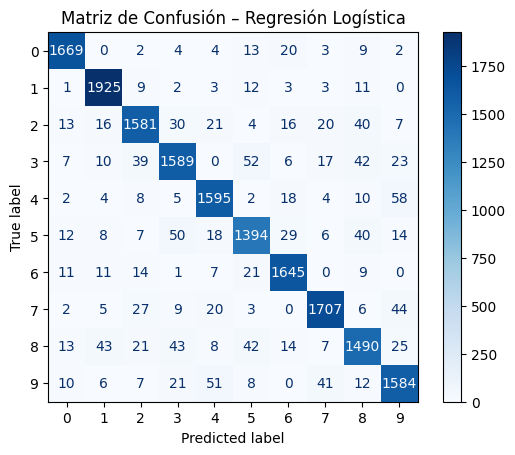

In [19]:
#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión – Regresión Logística')
plt.show()


4_ Visualice los parámetros del modelo (2 puntos)
- Recupere todos los parámetros del modelo (coefficients) para la Regresión Logística y Linear Support Vector Machines
- Plot los coeficientes en una imagen de 28*28 como en el caso anterior.
- Interprete los resultados. ¿A qué píxeles prestan más atención los modelos? ¿Por qué? ¿Hay alguna diferencia entre ambos modelos?

In [ ]:
# Estandarizar
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

# Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# SVM Lineal
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

In [ ]:
logreg_coef = logreg.coef_  # shape: (10, 784)
svm_coef = svm.coef_        # shape: (10, 784)

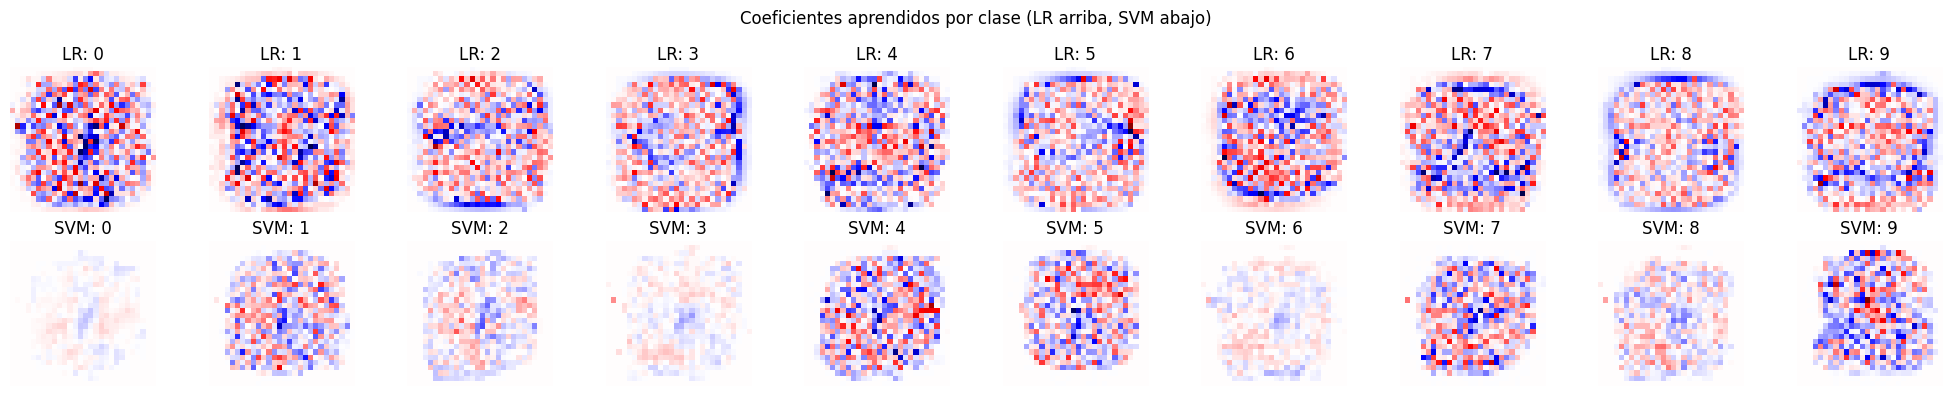

In [ ]:
classes = list(range(10))

fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i, digit in enumerate(classes):
    # Regresión Logística
    axes[0, i].imshow(logreg_coef[digit].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
    axes[0, i].axis('off')
    axes[0, i].set_title(f'LR: {digit}')
    
    # SVM
    axes[1, i].imshow(svm_coef[digit].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
    axes[1, i].axis('off')
    axes[1, i].set_title(f'SVM: {digit}')

plt.suptitle("Coeficientes aprendidos por clase (LR arriba, SVM abajo)")
plt.tight_layout()
plt.show()

5_ Ahora use el dataset CIFAR-10  (Alex Krizhevsky (2009) Learning Multiple Layers of Features from Tiny Images, Tech Report.).  (2.5 puntos)

 [CIFAR-10](https://www.openml.org/d/40927)  es un subconjunto etiquetado del conjunto de datos de 80 millones de imágenes diminutas. Consta (originalmente) de 32x32 imágenes en color que representan 10 clases de objetos:

0.   avión
1.   automóvil
2.   pájaro
3.   gato
4.   ciervo
5.   perro
6.   rana
7.   caballo
8.   barco
9.   camión

CIFAR-10 contiene 6000 imágenes por clase. La división original de entrenamiento-prueba las dividió aleatoriamente en 5000 imágenes de entrenamiento y 1000 de prueba por clase.


*   ¿Cómo aplicarías en este dataset los procesos previoes al paso 1 de este notebook (es decir, la lectura, el pre-tratamiento y el plot), ¿qué ajustes  deberías hacer a las imágenes?. Justifique su respuesta.

*   ¿Cómo aplicarías los pasos del punto 1 de este notebook (es decir Evalúe k-Nearest Neighbors, Regresión Logística y SVM Lineal). Muestre sus resultados, coméntelos y explique las adecuaciones que ha tenido que realizar.

*   Puede usar como base el código que se presenta en las líneas siguientes:



In [11]:
# Descargar la data para el dataset CIFAR-10. Demora un poco la primera vez
cifar = oml.datasets.get_dataset(40927)
X_ori, y_ori, _, _ = cifar.get_data(target=cifar.default_target_attribute);
cifar_classes = {0:"airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog",
                  6: "frog", 7: "horse", 8: "ship", 9: "truck"}



In [12]:
X_ori

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3062,a3063,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071
0,26,17,13,13,13,14,14,15,14,10,...,250,237,144,33,29,46,28,27,26,27
1,94,101,95,94,94,97,111,142,166,154,...,149,145,147,150,152,163,174,182,184,155
2,183,158,166,167,169,171,163,163,160,161,...,186,174,177,227,250,250,250,250,250,250
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,182,156,156,144,118,132,148,118,136,85,...,87,83,83,75,79,72,68,73,67,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
59996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
59997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
59998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


Ajuste el código de las líneas siguientes para que funcione de manera correcta para pintar las imágenes en escala de grises (grayscale).  Cambie lo que considere necesario.

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Convertir a numpy y escalar entre 0 y 1
X = X_ori.to_numpy() / 255.0
y = y_ori.to_numpy()

# Convertir a escala de grises (opcional)
# CIFAR está en RGB → 3072 features = 32*32*3
# Puedes simplemente aplanar
X = X.reshape((X.shape[0], -1))  # Convertir de (n, 3072) a 2D

# División para entrenamiento
X_sample, _, y_sample, _ = train_test_split(X, y, stratify=y, test_size=0.9, random_state=42)


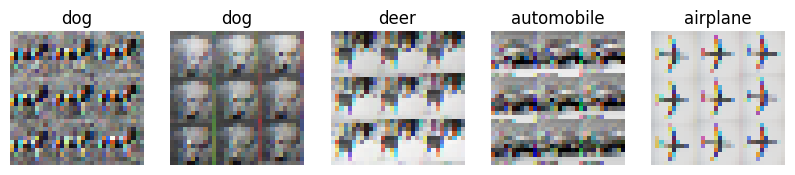

In [18]:
# Toma algunos ejemplos aleatorios, reescala las images al tamaño de 32x32 image y muestralas
from random import randint
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    n = randint(0, len(X_ori)-1)
    img = X_ori.iloc[n].values.reshape(32, 32, 3).astype(np.uint8)  # reshape en color
    axes[i].imshow(img)
    axes[i].set_title(cifar_classes[int(y_ori.iloc[n])])
    axes[i].axis('off')
plt.show()


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Modelos con configuración por defecto
modelos = {
    "KNN": KNeighborsClassifier(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVM Lineal": SVC(kernel='linear')
}

# Evaluación
for nombre, modelo in modelos.items():
    pipe = make_pipeline(StandardScaler(), modelo)
    scores = cross_val_score(pipe, X_sample, y_sample, cv=3, scoring='accuracy')
    print(f"{nombre}: Accuracy promedio = {scores.mean():.4f}, Desviación estándar = {scores.std():.4f}")


KNN: Accuracy promedio = 0.2690, Desviación estándar = 0.0082
Regresión Logística: Accuracy promedio = 0.2752, Desviación estándar = 0.0076
SVM Lineal: Accuracy promedio = 0.3080, Desviación estándar = 0.0049
